In [1]:
import numpy as np
import pandas as pd
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [8]:
# load list of patients by directory in data

path_data = '/home/gantos/data/stage1/'

# slice patients
start, end = [0, 1]
patients = os.listdir(path_data)[start:end]

In [34]:
labelsDF = pd.DataFrame.from_csv('/home/katya/data/stage1_labels.csv', sep=',')

cancerPatients = labelsDF[labelsDF.cancer==1]
cancerPatients = cancerPatients.index.values[10:15]

healthyPatients = labelsDF[labelsDF.cancer==0]
healthyPatients = healthyPatients.index.values[10:15]

In [35]:
# 3-D plots a single scan

def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [36]:
# Loads a single scan from given folder path

def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

### 1. Cancer patients

In [37]:
# load_scan example dictionary

load_scan_dict = {}
load_scan_array_dict = {}

for patient in cancerPatients:
    load_scan_dict[patient] = load_scan(path_data + patient)
    load_scan_array_dict[patient] = np.stack([s.pixel_array for s in load_scan_dict[patient]]).astype(np.int16)

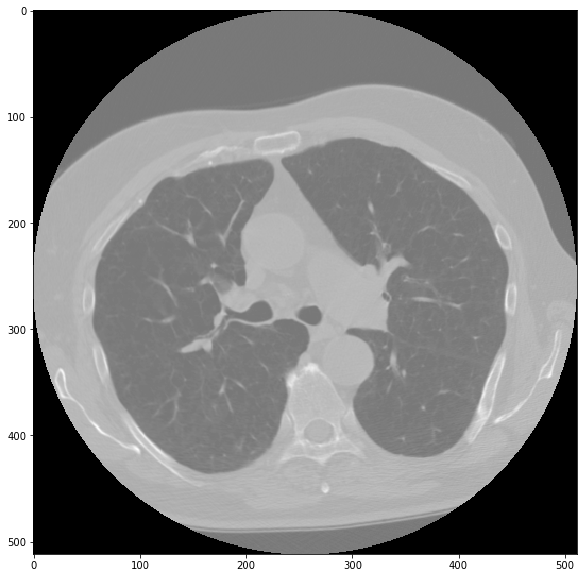

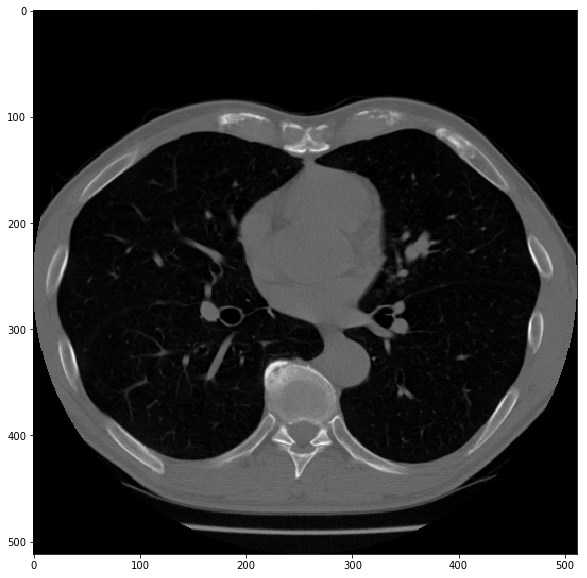

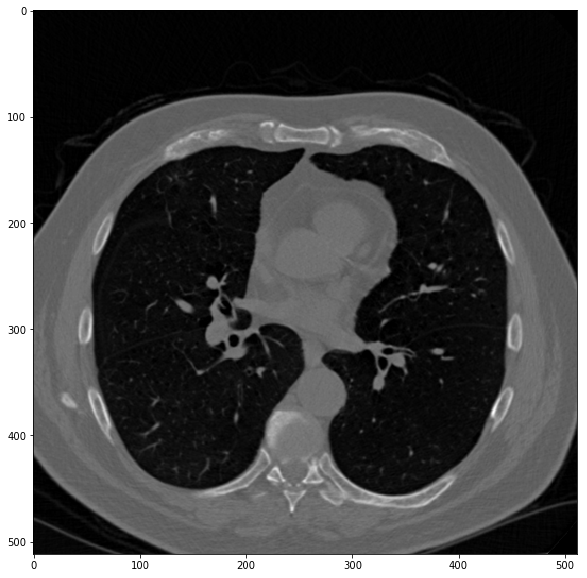

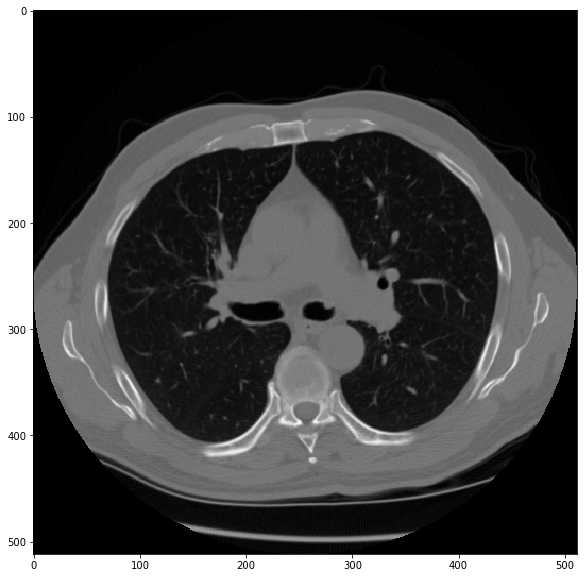

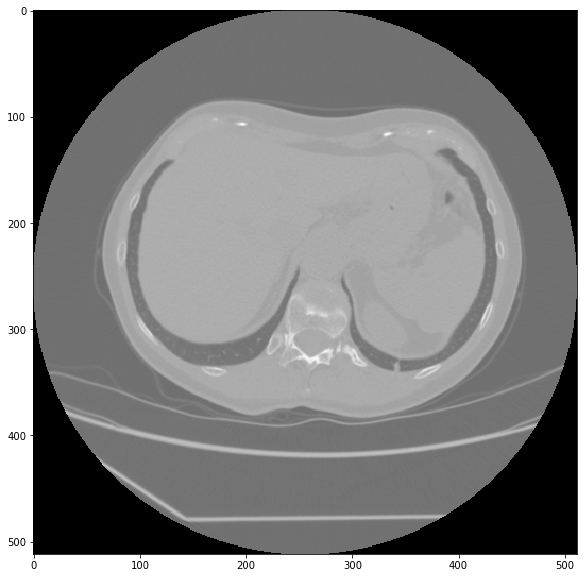

In [38]:
for patient in cancerPatients:
    plt.figure(figsize=[10,10])
    plt.imshow(load_scan_array_dict[patient][80], cmap=plt.cm.gray)
    plt.show()

### 2. Healthy patients

In [39]:
# load_scan example dictionary

load_scan_dict = {}
load_scan_array_dict = {}

for patient in healthyPatients:
    load_scan_dict[patient] = load_scan(path_data + patient)
    load_scan_array_dict[patient] = np.stack([s.pixel_array for s in load_scan_dict[patient]]).astype(np.int16)

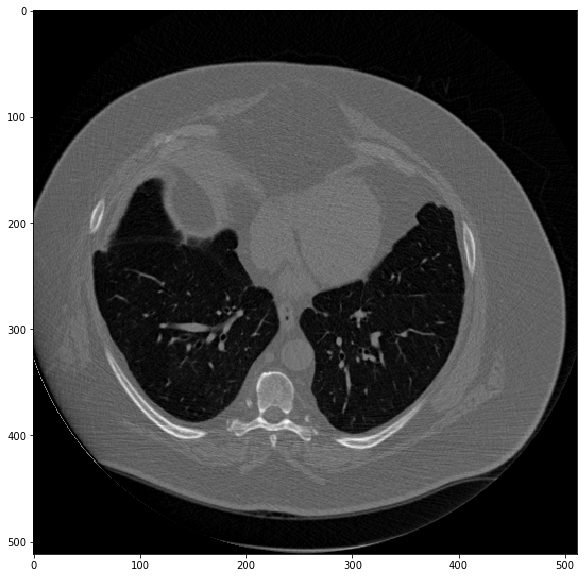

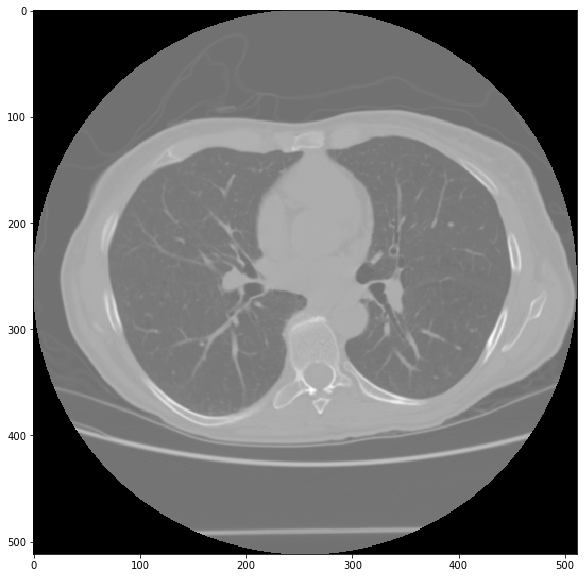

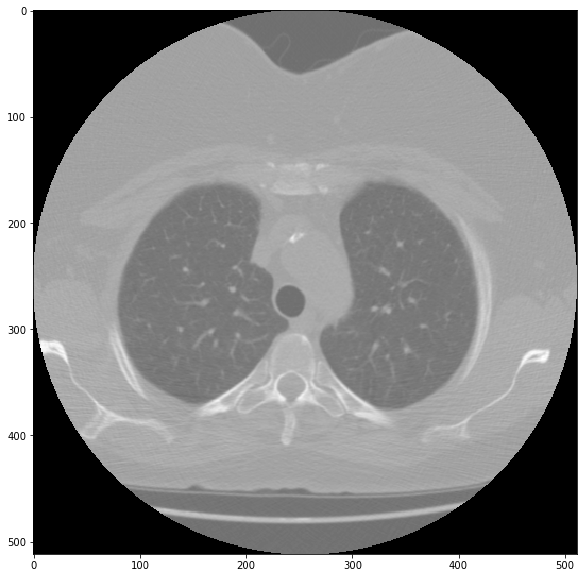

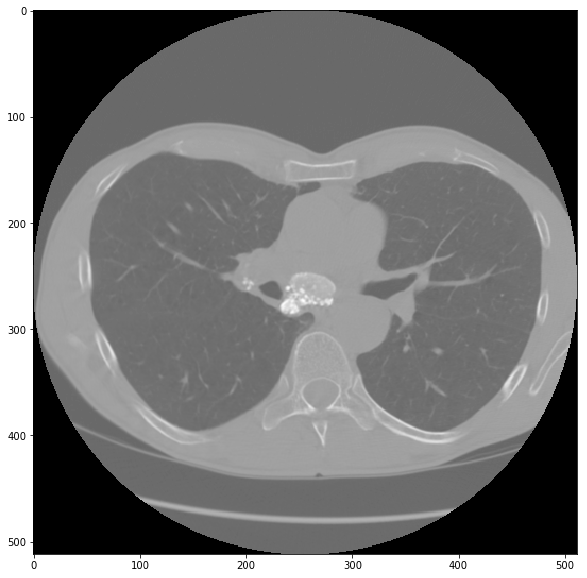

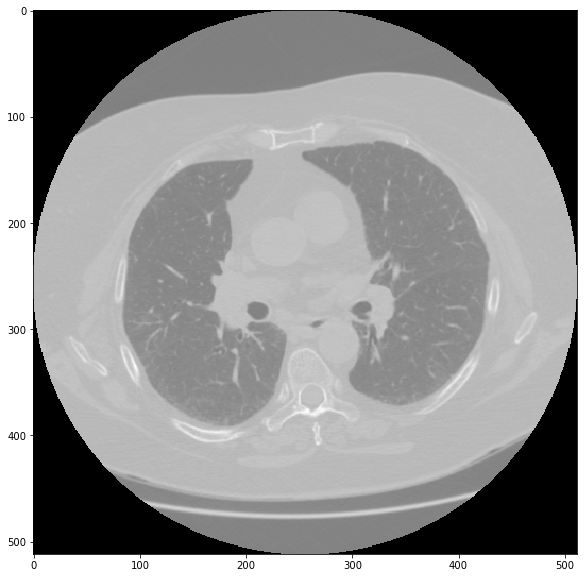

In [40]:
for patient in healthyPatients:
    plt.figure(figsize=[10,10])
    plt.imshow(load_scan_array_dict[patient][80], cmap=plt.cm.gray)
    plt.show()